# 数据分析

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS

## 读取数据

In [20]:
# 读取数据
df = pd.read_excel("./final_data.xls")
# 查看数据概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10795 entries, 0 to 10794
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stk_cd  10795 non-null  int64  
 1   YEAR    10795 non-null  int64  
 2   BP      10795 non-null  float64
 3   CSR     10795 non-null  float64
 4   TOP10   10795 non-null  float64
 5   TOBINQ  10795 non-null  float64
 6   LEV     10795 non-null  float64
 7   SIZE    10795 non-null  float64
 8   SOE     10795 non-null  float64
 9   IND     10795 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 843.5 KB


In [21]:
from scipy.stats.mstats import winsorize

df['BP'] = winsorize(df['BP'], limits=[0.01, 0.01])
print(df)

       Stk_cd  YEAR       BP    CSR  TOP10    TOBINQ       LEV       SIZE  \
0           2  2016  19.0279  76.52  57.40  1.069010  0.805367  27.445504   
1           2  2017  21.3626  41.87  68.53  1.117963  0.839813  27.784040   
2           2  2018  23.3355  41.88  71.70  1.015736  0.845856  28.055360   
3           2  2019  21.7825  41.80  64.24  1.046272  0.843590  28.179102   
4           2  2020  19.1154  41.74  58.98  0.992654  0.812835  28.256519   
...       ...   ...      ...    ...    ...       ...       ...        ...   
10790  603999  2016   4.8016  20.06  71.33  2.393348  0.124609  21.384553   
10791  603999  2017   4.1547  17.13  68.59  1.541950  0.121880  21.408195   
10792  603999  2018   2.3118  15.26  68.83  1.528609  0.136092  21.417421   
10793  603999  2019   3.6033  15.45  64.51  2.210450  0.151742  21.442878   
10794  603999  2020   4.2531  16.20  64.62  1.654336  0.166607  21.482746   

       SOE  IND  
0      0.0    0  
1      0.0    0  
2      0.0    0  
3  

In [22]:
# 创建虚拟变量（年份）
year_dummies = pd.get_dummies(df['YEAR'], prefix='YEAR', drop_first=True)
# 合并虚拟变量到原始数据
data_with_dummies = pd.concat([df, year_dummies], axis=1)
# 设置双重索引
data_with_dummies = data_with_dummies.set_index(["Stk_cd", "YEAR"])

In [23]:
print(data_with_dummies)

                  BP    CSR  TOP10    TOBINQ       LEV       SIZE  SOE  IND  \
Stk_cd YEAR                                                                   
2      2016  19.0279  76.52  57.40  1.069010  0.805367  27.445504  0.0    0   
       2017  21.3626  41.87  68.53  1.117963  0.839813  27.784040  0.0    0   
       2018  23.3355  41.88  71.70  1.015736  0.845856  28.055360  0.0    0   
       2019  21.7825  41.80  64.24  1.046272  0.843590  28.179102  0.0    0   
       2020  19.1154  41.74  58.98  0.992654  0.812835  28.256519  0.0    0   
...              ...    ...    ...       ...       ...        ...  ...  ...   
603999 2016   4.8016  20.06  71.33  2.393348  0.124609  21.384553  0.6    0   
       2017   4.1547  17.13  68.59  1.541950  0.121880  21.408195  0.6    0   
       2018   2.3118  15.26  68.83  1.528609  0.136092  21.417421  0.0    0   
       2019   3.6033  15.45  64.51  2.210450  0.151742  21.442878  0.0    0   
       2020   4.2531  16.20  64.62  1.654336  0.1666

## 描述性分析和相关性分析

In [24]:
df = df.set_index(["Stk_cd", "YEAR"])
# 描述性分析
print(df.describe())
# # 绘制相关性热图
# import seaborn as sns
# sns.heatmap(df.corr(), annot=True, cmap="Blues")
# # 描述性分析
# print(data_with_dummies.describe())
# # 相关性分析
# print(data_with_dummies.corr())
# # 绘制相关性热图
# import seaborn as sns
#
# sns.heatmap(data_with_dummies.corr(), annot=True, cmap="Blues")

                 BP           CSR         TOP10        TOBINQ           LEV  \
count  10795.000000  10795.000000  10795.000000  10795.000000  10795.000000   
mean       5.983683     21.034719     57.030764      2.007117      0.432658   
std       12.430816     12.232101     14.610519      1.887513      0.197734   
min      -58.259500    -18.450000     14.590000      0.673522      0.008359   
25%        2.653300     15.220000     46.490000      1.170746      0.278299   
50%        6.600700     20.950000     57.100000      1.555917      0.426855   
75%       11.488500     26.160000     67.365000      2.231669      0.578399   
max       35.817800     87.020000    100.970000     78.751176      0.994273   

               SIZE           SOE           IND  
count  10795.000000  10795.000000  10795.000000  
mean      22.540144      0.025238      0.637054  
std        1.331718      0.093531      0.480872  
min       17.654202      0.000000      0.000000  
25%       21.641957      0.000000     

              BP       CSR     TOP10    TOBINQ       LEV      SIZE       SOE  \
BP      1.000000  0.549841  0.206898  0.046521 -0.137994  0.178942  0.036641   
CSR     0.549841  1.000000  0.220947 -0.003687 -0.078143  0.253733  0.063062   
TOP10   0.206898  0.220947  1.000000 -0.051758 -0.008249  0.286073  0.197864   
TOBINQ  0.046521 -0.003687 -0.051758  1.000000 -0.204063 -0.358961 -0.087785   
LEV    -0.137994 -0.078143 -0.008249 -0.204063  1.000000  0.492756  0.104317   
SIZE    0.178942  0.253733  0.286073 -0.358961  0.492756  1.000000  0.165915   
SOE     0.036641  0.063062  0.197864 -0.087785  0.104317  0.165915  1.000000   
IND     0.032178 -0.095678 -0.059966  0.070088 -0.206007 -0.218147 -0.111598   

             IND  
BP      0.032178  
CSR    -0.095678  
TOP10  -0.059966  
TOBINQ  0.070088  
LEV    -0.206007  
SIZE   -0.218147  
SOE    -0.111598  
IND     1.000000  


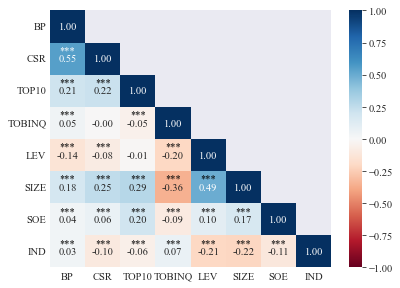

In [25]:
# 相关性分析
print(df.corr())
# here put the import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import matplotlib as mpl


def cm2inch(x, y):
    return x / 2.54, y / 2.54


size1 = 10.5
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family": 'serif',
        "font.size": size1,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold', 'size': size1, 'family': 'SimHei'}

df_coor = df.corr()
fig = plt.figure(figsize=(cm2inch(16, 12)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask) - 1) * (-1)
mask = np.rot90(mask, k=-1)

im1 = sns.heatmap(df_coor, annot=True, cmap="RdBu"
                  , mask=mask  #构造mask，去除重复数据显示
                  , vmax=1, vmin=-1
                  , fmt='.2f', ax=ax1)

ax1.tick_params(axis='both', length=0)

#计算相关性显著性并显示
rlist = []
plist = []
for i in df.columns.values:
    for j in df.columns.values:
        r, p = pearsonr(df[i], df[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(len(df.columns.values), len(df.columns.values))
parr = np.asarray(plist).reshape(len(df.columns.values), len(df.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m), int(n)])
        rv = (rarr[int(m), int(n)])
        if mask2[int(m), int(n)] < 1.:
            if abs(rv) > 0.5:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='white')
                if pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='white')
                if pv < 0.001:
                    # print([int(m),int(n)])
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='white')
            else:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='k')
                elif pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='k')
                elif pv < 0.001:
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='k')
plt.savefig(r'D:\学期\大三春\计量经济学\大作业\成品\fig\r_demo.png', dpi=600)
plt.show()

## 固定效应模型

In [26]:
# 建立固定效应模型
model_fe = PanelOLS(data_with_dummies['BP'],
                    data_with_dummies[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                         'YEAR_2019', 'YEAR_2020']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary

Dep. Variable:,BP,R-squared:,0.2825
Estimator:,PanelOLS,R-squared (Between):,-317.22
No. Observations:,10795,R-squared (Within):,0.2825
Date:,"Mon, May 22 2023",R-squared (Overall):,-170.86
Time:,16:52:22,Log-likelihood,-3.768e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,308.73
Entities:,2159,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,8625)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,308.73


## 随机效应模型

In [27]:
from linearmodels import RandomEffects

# 建立随机效应模型
model_re = RandomEffects(data_with_dummies['BP'],
                         data_with_dummies[
                             ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                              'YEAR_2019',
                              'YEAR_2020']])
# 拟合模型
results_re = model_re.fit()
# 查看回归结果
results_re.summary

Dep. Variable:,BP,R-squared:,0.3816
Estimator:,RandomEffects,R-squared (Between):,0.6559
No. Observations:,10795,R-squared (Within):,0.2181
Date:,"Mon, May 22 2023",R-squared (Overall):,0.4541
Time:,16:52:23,Log-likelihood,-3.94e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,604.93
Entities:,2159,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,10784)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,604.93


## B-P 检验

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf

# 读取回归模型的残差和预测值读取回归模型的残差和预测值
results_ols = smf.ols('BP ~ CSR + SIZE + LEV + SOE + IND + YEAR_2017 + YEAR_2018 + YEAR_2019 + YEAR_2020',
                      data=data_with_dummies).fit()
residuals = results_ols.resid
# residuals = results_re.resids

# 获取预测值
predicted_values = results_ols.predict()
# predicted_values = results_re.predict()

# 进行B-P检验
bp_test = het_breuschpagan(residuals, sm.add_constant(predicted_values))

# 输出B-P检验结果
print("BP Test Statistic:", bp_test[0])
print("BP p-value:", bp_test[1])
print("BP Test Results:", bp_test[2:])

BP Test Statistic: 356.44270497203314
BP p-value: 1.6756575613356534e-79
BP Test Results: (368.5457679669555, 8.55340232818948e-81)


In [29]:
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     624.5
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        16:52:23   Log-Likelihood:                -40258.
No. Observations:               10795   AIC:                         8.054e+04
Df Residuals:                   10785   BIC:                         8.061e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.7764      1.891    -16.805      0.0

## 进行Hausman检验

In [30]:
# Hausman检验
from linearmodels.panel import compare

comparison = compare({'FE': results_fe, 'RE': results_re})
print(comparison.summary)

                    Model Comparison                    
                                    FE                RE
--------------------------------------------------------
Dep. Variable                       BP                BP
Estimator                     PanelOLS     RandomEffects
No. Observations                 10795             10795
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.2825            0.3816
R-Squared (Within)              0.2825            0.2181
R-Squared (Between)            -317.22            0.6559
R-Squared (Overall)            -170.86            0.4541
F-statistic                     308.73            604.93
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
CSR                             0.4181            0.5283
                              (40.346)          (57.764)
SIZE                            8.2843           -0.4176
                              (

In [31]:
# 1. 运用计量书本上的公式，自编函数， 因为目前 Python 里面没有现成的模块
import numpy.linalg as la
from scipy import stats


def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval


# 2. 将fe,re结果带入自编函数之中。
hausman_results = hausman(results_fe, results_re)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

# 3. 看结果，如果这儿的 p-Value 小于 10%，则支持 固定效应 模型。

chi-Squared: 1100.3399221819257
degrees of freedom: 11
p-Value: 4.7991159896803964e-229


In [32]:
# b_fe = results_fe.params
# b_re = results_re.params
# b_diff = b_fe - b_re
# v_fe = results_fe.cov
# v_re = results_re.cov
# v_diff = v_fe - v_re
# df = len(b_fe)
#
# table = pd.DataFrame({'FE': b_fe, 'RE': b_re, 'Difference': b_diff, 'sqrt(diag(v_fe-v_re))': np.sqrt(np.diag(v_diff))})
# chi2 = np.dot(b_diff.T, np.linalg.inv(v_diff).dot(b_diff))
# pval = 1 - stats.chi2.cdf(chi2, df)
#
# print(table)
# print()
# print(f'chi-Squared: {chi2:.2f}')
# print(f'degrees of freedom: {df}')
# print(f'p-Value:{pval:.5f}')

# 异质性分析

In [33]:
# 导入patsy库
import patsy

# 生成交互项
interaction = patsy.dmatrix('CSR:IND', data=data_with_dummies, return_type='dataframe')
# 将交互项合并到原始数据中
data_with_interaction = pd.concat([data_with_dummies, interaction], axis=1)
# 建立固定效应模型
model_fe = PanelOLS(data_with_interaction['BP'],
                    data_with_interaction[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                         'YEAR_2019', 'YEAR_2020',
                         'CSR:IND'  # CSR和IND的交互项
                         ]],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
results_fe = model_fe.fit()  # 拟合模型
print(results_fe.summary)  # 打印回归结果
# 观察交互项的系数是否显著不为零，如果是，说明存在异质性效应

                          PanelOLS Estimation Summary                           
Dep. Variable:                     BP   R-squared:                        0.2826
Estimator:                   PanelOLS   R-squared (Between):             -318.18
No. Observations:               10795   R-squared (Within):               0.2826
Date:                Mon, May 22 2023   R-squared (Overall):             -171.37
Time:                        16:52:23   Log-likelihood                -3.767e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      283.13
Entities:                        2159   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                 F(12,8624)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             283.13
                            

# 稳健性检验

In [46]:
# 选择2017年和2018年的数据作为子样本
sub_data = data_with_dummies.loc[data_with_dummies.index.get_level_values('YEAR').isin([2017, 2018])]
# 建立固定效应模型
model_fe = PanelOLS(sub_data['BP'],
                    sub_data[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary

# 对CSR变量进行缩尾处理，去除上下1%的极端值
from scipy.stats.mstats import winsorize

data_with_dummies['CSR'] = winsorize(data_with_dummies['CSR'], limits=[0.01, 0.01])
# 建立固定效应模型
model_fe = PanelOLS(data_with_dummies['BP'],
                    data_with_dummies[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                         'YEAR_2019', 'YEAR_2020']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary


Dep. Variable:,BP,R-squared:,0.2860
Estimator:,PanelOLS,R-squared (Between):,-307.99
No. Observations:,10795,R-squared (Within):,0.2860
Date:,"Mon, May 22 2023",R-squared (Overall):,-165.88
Time:,17:11:13,Log-likelihood,-3.765e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,314.05
Entities:,2159,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,8625)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,314.05
